Mean Squared Error: 1138664.6631793943
R-squared: 0.5810606315481677


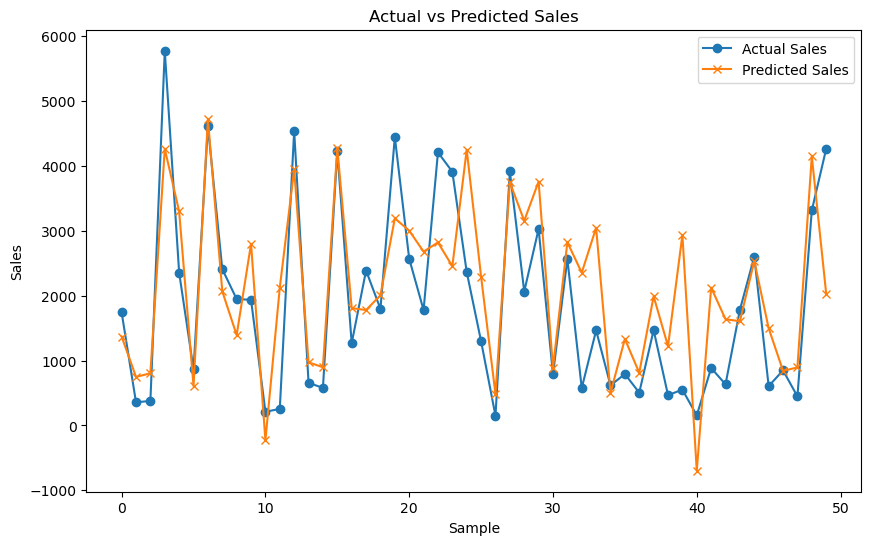

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'Train.csv'
data = pd.read_csv(file_path)

# Handling missing values
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

# Encoding categorical variables
data = pd.get_dummies(data, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], drop_first=True)

# Feature engineering
data['Years_of_Operation'] = 2024 - data['Outlet_Establishment_Year']

# Drop columns that won't be used in prediction
data.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Type'], axis=1, inplace=True)

# Split data into features and target
X = data.drop('Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:50], label='Actual Sales', marker='o')
plt.plot(y_pred[:50], label='Predicted Sales', marker='x')
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.xlabel('Sample')
plt.ylabel('Sales')
plt.show()
